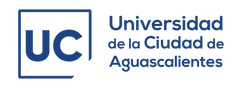

# **METODOS NUMERICOS II**

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

# <font color=green>ESTADÍSTICA INFERENCIAL</font>

***

Se dedica a estudiar cómo sacar conclusiones generales para toda la población a partir del estudio de una muestra, y el grado de fiabilidad o significación de los resultados obtenidos. Sus principales herramientas son el muestreo, la estimación de parámetros y el contraste de hipótesis.

## <font color=green>Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de ocurrencia de solo dos categorías. Estas categorías juntas representan todo el espacio muestral, y además son mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas de situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tengan éxito

### Combinaciones

Es importante resaltar que la expresión entre paréntesis no es una expresión matricial, sino que es el resultado de una combinación sin repetición. Este se obtiene con la siguiente fórmula:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición:

## $$0! = 1$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [4]:
from scipy.special import comb

## <font color='blue'>Ejemplo: Mega Sorteo</font>

En un billete de lotería Mega Sorteo tenemos un total de **60 números** a elegir donde la apuesta mínima es de **seis números**. Tú que tienes curiosidad decides calcular la probabilidad de ganar el Mega Sorteo con solo **un juego**. Para ello necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [12]:
combinaciones_loteria = comb(6, 60)
print(combinaciones_loteria)

0.0


In [11]:
p_ganar = (1/combinaciones_loteria)*100
print("%0.10f" % p_ganar ) #trunc en 10 decimales

0.0000019974


## <font color='blue'>Ejemplo: Concurso para Data Scientist</font>

En un concurso para cubrir una vacante de científico de datos tenemos un total de **10 preguntas de opción múltiple** con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Supongamos que un candidato decide aventurarse sin haber estudiado nada en absoluto. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y el puntaje de corte es 5**, obtenga la probabilidad de que este candidato **responda correctamente 5 preguntas** y también la probabilidad de que este candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cual es la cantidad de preguntas o ensayos ($n$)?

In [15]:
n = 10
n

10

### ¿Cuál es la probabilidad de éxito ($p$)?



In [19]:
cant_respuestas = 3
cant_respuestas_correcta = 1
p = cant_respuestas_correcta / cant_respuestas
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [21]:
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número de eventos que se desea tener éxito ($k$)?

In [18]:
k = 5
k

5

### Solución 1

In [25]:
#p(5) = (n k)* p^k * q^(n-k)
probab_5 = comb(n, k) * (p**k) * (q**(n-k)) * 100
print("%0.4f"%probab_5)

13.6565


### Solución 2

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [26]:
from scipy.stats import binom

In [27]:
probab2_5 = binom.pmf(k, n, p) * 100
print("%0.4f" % probab2_5)

13.6565


### Obtener la probabilidad de que el candidato pase la prueba

### $$P(Aprobado \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [32]:
probab_manual = (binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) +
                binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)) * 100
print("%0.4f" % probab_manual)

21.3128


In [31]:
for k in range(5,11):
    probab += binom.pmf(k, n, p) * 100

print("%0.4f" % probab)

21.3145


In [35]:
binom.pmf([i for i in range(5,11)], n, p).sum() * 100

21.312808006909492

<font color='blue'>Ejemplo: Juego </font>

En un pueblo se organiza una juego de azar todos los años para recaudar fondos para el hospital de la ciudad. Se sabe que la **proporción de mujeres participantes es del 60%**. **El número total de equipos, con 12 integrantes, inscritos para este año es de 30**. Con la información anterior responde: ¿Cual es la probabilidad de que el equipos pueda ser formado por **8 mujeres**?

### Solución

In [46]:
'''
n = 30    # cantidad de ensayos
p = 8/12  # probabilidad de éxito
q = 1 - p # probabilidad de fracaso
k =  30 # número de eventos a tener éxito

binom.pmf(k, n, q) * 100
'''

In [55]:
n = 12
p = 0.6
q = 1- p
k = 8
binom.pmf(k, n, p) * 100

21.284093952

In [51]:
tot_personas = 12 * 30
tot_mujeres = tot_personas * .6
print(tot_mujeres)

216.0


In [59]:
n = 12
p = 0.6
q = 1-0.6
k = 8
binom.pmf(k, n, p) * 100

21.284093952